# Lab2: Binary classification and model evaluation

## Part 1. Spam classification
Each object in dataset is a letter with features based on text, spam is a positive example 1, normal letter - negative 0.

dataset: Spambase


In [23]:
import pandas as pd
import numpy as np

#### 1.1 Spambase dataset downloading

In [24]:
#there are some problems with urllib2 or urllib.request...
feature_names = [
    line.strip().split(':')[0] 
    for line in open('spambase.names').readlines()[33:]
]
spam_data = pd.read_csv('spambase.data', header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
spam_data.head()  

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The rows give information about frequensy of each word in each letter. th,e colums "spam" was added, 1- spam, 0 - regular.

#### 1.2 How many letters in a dataset ?

In [25]:
print ("There are", len(spam_data), "letters ")

There are 4601 letters 


#### 1.3 Which portion of them is bad (spam) ?

In [26]:
x1=len(spam_data.groupby('spam').get_group(1))
x2=len(spam_data)
x3=x1/x2*100
print ("portion of spam is:", x3, "%")

portion of spam is: 39.404477287546186 %


#### 1.4 How you can group letters' features?

In [27]:
#  by frequency of:
# spam/regular
#each word, numbers - as word, 
#symbol, - as char
#length_average, length_longest,length_total  -capital_run_

import re
import collections

print (spam_data['spam'].value_counts())

y=[]
for i in spam_data.columns.values:
    result1 = re.findall(r'word_freq_', i)
    result2 = re.findall(r'char_freq_', i)
    result3 = re.findall(r'capital_run_', i)
    if result1:
        y=y+result1
    elif result2:
        y=y+result2
    elif result3:
        y=y+result3

y2=collections.Counter(y)
y2.most_common()

0    2788
1    1813
Name: spam, dtype: int64


[('word_freq_', 48), ('char_freq_', 6), ('capital_run_', 3)]

All letters were devided by 4 groups:
1. Spam/regular group -  1813 spam, 2788 regular
2. Type "word" - 48
3. Type "char" - 6
4. Type "capital_run" - 3

## Part 2 Classifier training and it's evaluation

As a result of this task you should get following models and compare them between each other: 
Constant model / Decision tree / KNN /  KNN with rescaling

#### 2.1 Split dataset into to disjoint subsets: train - first 3000 examples, test - all others

In [28]:
#creating data
train = spam_data[0:3000]
test = spam_data[3000:]

train , y_train = train.drop('spam', 1), list(train['spam'])
test, y_test = test.drop('spam', 1), list(test['spam'])

#### 2.2 Train decision tree with train. Classify examples from test. Calculate classification quality metrics: Accuracy, Precision, Recall, F1.



In [29]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 


#settings
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(train, y_train)

#prediction
expected = y_test
predicted = model.predict(test)
target_names = ['regular','spam'] ##

#quality
print ("accuracy=",accuracy_score(expected, predicted))
print (metrics.classification_report(expected, predicted,target_names=target_names))
print( "Confusion_matrix:")
print (metrics.confusion_matrix(expected, predicted))

accuracy= 0.769519050593
             precision    recall  f1-score   support

    regular       1.00      0.77      0.87      1601
       spam       0.00      0.00      0.00         0

avg / total       1.00      0.77      0.87      1601

Confusion_matrix:
[[1232  369]
 [   0    0]]


C:\Users\Ella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Quality metrics:
1. Accuracy = (TP + TN) / (TP + TN + FP + FN) — fraction of correct predictions
2. Precision = TP / (TP + FP) — accuracy, fraction of real spam in the letters classified as spam
3. Recall = TP / (TP + FN) — completeness, fraction of filtered spam
4. F1 = 2TP / (2TP + FP + FN) — harmonic mean of precision and recall

#### 2.3 Which drawbacks does evaluation on this test have? How you can make evalution more informative?

The first disadvantage is sorted dataset. There is a case when all letters are regular, wihout spam variants. So, testing isn't informative.

Based on this, it is neccessary to make another test set. So, spamdata set should be shuffled before evaluating.

#### 2.4 Repeat experiment with dataset shuffled before split

In [30]:
#shuffling data

from sklearn.utils import shuffle

data_shuf = spam_data
data_shuf = shuffle(data_shuf)

data_shuf.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
535,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000,0.421,0.0,0.210,0.632,0.0,3.75,15,60,1
415,0.62,0.0,0.62,0.0,1.25,0.0,0.62,0.0,0.0,0.0,...,0.000,0.000,0.0,0.456,0.273,0.0,2.52,22,121,1
3781,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.636,1.273,0.0,0.000,0.000,0.0,3.50,24,35,0
2541,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.000,0.0,4.80,19,24,0
3685,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.000,0.0,1.00,1,4,0


In [31]:
#creating data
train = data_shuf[0:3000]
test = data_shuf[3000:]

train , y_train = train.drop('spam', 1), list(train['spam'])
test, y_test = test.drop('spam', 1), list(test['spam'])

target_names = ['regular','spam'] ##

In [32]:
#Decision Tree Classifier
#settings
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(train, y_train)

#prediction
expected = y_test
predicted1 = model.predict(test)
predicted11 = model.predict_proba(test)

#quality
A1 = accuracy_score(expected, predicted1)
R1 = metrics.classification_report(expected, predicted1,target_names=target_names)
M1 = metrics.confusion_matrix(expected, predicted1)

print( 'DECISION TREE')

print ("accuracy=",A1)
print ("classification_report:" , R1)
print( "Confusion_matrix:decision tree:")
print (M1)

DECISION TREE
accuracy= 0.916302311056
classification_report:              precision    recall  f1-score   support

    regular       0.92      0.95      0.93       983
       spam       0.92      0.86      0.89       618

avg / total       0.92      0.92      0.92      1601

Confusion_matrix:decision tree:
[[934  49]
 [ 85 533]]


#### 2.5 Which features are the most informative? Use feature importance from DecisionTreeClassifier

In [33]:
most_important_features = np.argsort(model.feature_importances_)[::-1]
for idx in most_important_features:
    print ('%d %s, importance = %.2f' % (idx, spam_data.columns.values[idx], model.feature_importances_[idx]))

52 char_freq_$, importance = 0.42
6 word_freq_remove, importance = 0.18
51 char_freq_!, importance = 0.11
24 word_freq_hp, importance = 0.08
45 word_freq_edu, importance = 0.04
56 capital_run_length_total, importance = 0.04
15 word_freq_free, importance = 0.04
23 word_freq_money, importance = 0.02
55 capital_run_length_longest, importance = 0.01
26 word_freq_george, importance = 0.01
16 word_freq_business, importance = 0.01
48 char_freq_;, importance = 0.01
21 word_freq_font, importance = 0.01
44 word_freq_re, importance = 0.01
17 word_freq_email, importance = 0.00
25 word_freq_hpl, importance = 0.00
18 word_freq_you, importance = 0.00
54 capital_run_length_average, importance = 0.00
11 word_freq_will, importance = 0.00
27 word_freq_650, importance = 0.00
9 word_freq_mail, importance = 0.00
47 word_freq_conference, importance = 0.00
34 word_freq_85, importance = 0.00
10 word_freq_receive, importance = 0.00
50 char_freq_[, importance = 0.00
1 word_freq_address, importance = 0.00
2 word_

the most informative feature if frequency of char "$"

#### 2.6 What you can say about quality of the best constant model (constant model always predicts one class)

Dummy estimators

classification:constant 

always predicts a constant label that is provided by the user.

A major motivation of this method is F1-scoring, when the positive class is in the minority.

In [34]:
#Constant=0 model

from sklearn.dummy import DummyClassifier
random_state = 0

#settings
model = DummyClassifier(strategy='constant', random_state=random_state, constant=0)
model.fit(train, y_train)

#prediction
expected = y_test
c0 = model.predict(test)

#quality
A2 = accuracy_score(expected, c0)
R2 = metrics.classification_report(expected, c0,target_names=target_names)
M2 = metrics.confusion_matrix(expected, c0)

print ("CONSTANT MODEL C=0")

print ("accuracy=",A2)
print ("classification_report:" , R2)
print( "Confusion_matrix:decision tree:")
print (M2)

CONSTANT MODEL C=0
accuracy= 0.613991255465
classification_report:              precision    recall  f1-score   support

    regular       0.61      1.00      0.76       983
       spam       0.00      0.00      0.00       618

avg / total       0.38      0.61      0.47      1601

Confusion_matrix:decision tree:
[[983   0]
 [618   0]]


C:\Users\Ella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
#Constant model

#settings
model = DummyClassifier(strategy='constant', random_state=random_state, constant=1)
model.fit(train, y_train)

#prediction
expected = y_test
c1 = model.predict(test)
c11 = model.predict_proba(test)

#quality
A3 = accuracy_score(expected, c1)
R3 = metrics.classification_report(expected, c1,target_names=target_names)
M3 = metrics.confusion_matrix(expected, c1)

print ("CONSTANT MODEL C=1")

print ("accuracy=",A3)
print ("classification_report:" , R3)
print( "Confusion_matrix:decision tree:")
print (M3)

CONSTANT MODEL C=1
accuracy= 0.386008744535
classification_report:              precision    recall  f1-score   support

    regular       0.00      0.00      0.00       983
       spam       0.39      1.00      0.56       618

avg / total       0.15      0.39      0.22      1601

Confusion_matrix:decision tree:
[[  0 983]
 [  0 618]]


C:\Users\Ella\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 7 Train KNN model and evaluate it on test

In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#settings
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
neigh.fit(train, y_train) 

#prediction
expected = y_test
predicted4=neigh.predict(test)
predicted44 = neigh.predict_proba(test)

#quality
A4 = accuracy_score(expected, predicted4)
R4 = metrics.classification_report(expected, predicted4,target_names=target_names)
M4 = metrics.confusion_matrix(expected, predicted4)

print ("KNN")

print ("accuracy=",A4)
print ("classification_report:" , R4)
print( "Confusion_matrix:decision tree:")
print (M4)

KNN
accuracy= 0.782635852592
classification_report:              precision    recall  f1-score   support

    regular       0.80      0.85      0.83       983
       spam       0.74      0.67      0.70       618

avg / total       0.78      0.78      0.78      1601

Confusion_matrix:decision tree:
[[840 143]
 [205 413]]


#### 8 Train KNN for rescaled features. Evaluate quality of the model on test. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?

In [37]:
#rescaled features
from sklearn import preprocessing
from sklearn.preprocessing import scale

X = data_shuf.drop('spam', 1)
X1= data_shuf['spam']

X_scaled = preprocessing.scale(X)

X_scaled1=np.column_stack((X_scaled, X1))
type(X_scaled1)
df = pd.DataFrame(X_scaled1)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,1.043072,-0.155198,-0.072428,2.262263,-0.103048,-0.045436,-0.190757,-0.368293,1.0
1,1.688194,-0.165072,0.673183,-0.0469,1.394588,-0.350266,1.292268,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.229197,0.802054,-0.103048,-0.084206,-0.154835,-0.267680,1.0
2,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,2.454048,4.194823,-0.155198,-0.329912,-0.308355,-0.103048,-0.053316,-0.144572,-0.409528,0.0
3,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.012341,-0.170230,-0.427671,0.0
4,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,-0.329912,-0.308355,-0.103048,-0.132116,-0.262599,-0.460659,0.0


In [38]:
# KNN with rescaling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#creating data
train= df[0:3000]
test = df[3000:]
# 57 is "spam"
train , y_train = train.drop(57, 1), list(train[57])
test, y_test = test.drop(57, 1), list(test[57])

#settings
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
neigh.fit(train, y_train) 

#prediction
expected = y_test
predicted5=neigh.predict(test)
predicted55 = neigh.predict_proba(test)

#quality
A5 = accuracy_score(expected, predicted5)
R5 = metrics.classification_report(expected, predicted5,target_names=target_names)
M5 = metrics.confusion_matrix(expected, predicted5)

print ("KNN with rescaling")

print ("accuracy=",A5)
print ("classification_report:" , R5)
print( "Confusion_matrix:decision tree:")
print (M5)

KNN with rescaling
accuracy= 0.904434728295
classification_report:              precision    recall  f1-score   support

    regular       0.90      0.95      0.92       983
       spam       0.92      0.83      0.87       618

avg / total       0.91      0.90      0.90      1601

Confusion_matrix:decision tree:
[[936  47]
 [106 512]]


Does rescaled feature increased metrics for KNN?

 -Yes, transformation makes results better

##### Rescaling for Decision Tree

In [39]:
# Desicion Tree with rescaling

#settings
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(train, y_train)

#prediction
expected = y_test
predicted = model.predict(test)

#quality
A6 = accuracy_score(expected, predicted)
R6 = metrics.classification_report(expected, predicted,target_names=target_names)
M6 = metrics.confusion_matrix(expected, predicted)

print ("Decision Tree with rescaling")

print ("accuracy=",A6)
print ("classification_report:" , R6)
print( "Confusion_matrix:decision tree:")
print (M6)

Decision Tree with rescaling
accuracy= 0.916926920675
classification_report:              precision    recall  f1-score   support

    regular       0.92      0.95      0.93       983
       spam       0.92      0.86      0.89       618

avg / total       0.92      0.92      0.92      1601

Confusion_matrix:decision tree:
[[934  49]
 [ 84 534]]


The same results as without rescaling decision tree

#### 9 Compare all models by all metrics

In [40]:
print('Accuracy')
print ('  constant model,c=1', A3)
print ('  deciion tree', A1)
print ('  KNN', A4)
print ('  KNN with rescaling', A5)

Accuracy
  constant model,c=1 0.386008744535
  deciion tree 0.916302311056
  KNN 0.782635852592
  KNN with rescaling 0.904434728295


In [41]:
print ("Classification_report")
print("")
print ('constant model,c=1')
print (R3)
print("----------------------------------------------------------")
print ('decision tree')
print (R1)
print("----------------------------------------------------------")
print ('KNN')
print(R4)
print("----------------------------------------------------------")
print ('KNN with rescaling')
print(R5)

Classification_report

constant model,c=1
             precision    recall  f1-score   support

    regular       0.00      0.00      0.00       983
       spam       0.39      1.00      0.56       618

avg / total       0.15      0.39      0.22      1601

----------------------------------------------------------
decision tree
             precision    recall  f1-score   support

    regular       0.92      0.95      0.93       983
       spam       0.92      0.86      0.89       618

avg / total       0.92      0.92      0.92      1601

----------------------------------------------------------
KNN
             precision    recall  f1-score   support

    regular       0.80      0.85      0.83       983
       spam       0.74      0.67      0.70       618

avg / total       0.78      0.78      0.78      1601

----------------------------------------------------------
KNN with rescaling
             precision    recall  f1-score   support

    regular       0.90      0.95      0.92   

## 3. Classification threshold selection

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ella\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### 1 Which classifier has AUC-ROC near 0?

AUC-ROC - Area Under the Receiver Operating Characteristic curve. 

Interpritation of AUC-ROC:
The expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative.

A value of less than 0.5 says that the classifier operates exactly the opposite: if the positive are called negative and vice versa, the classifier will work better. 
so, it means that in 0 everising is inverse. replacing true anf false variables will give the value 1.

#### 3.1 Draw ROC and Precision/Recall curves on the same coordinate plane with different colors. Add legend.

#### ROC

* (09.04.17) plot ROC curve correctly (use predict_proba)


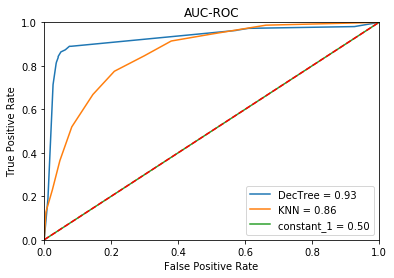

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#train = data_shuf[0:3000] ##
#test = data_shuf[3000:]   ##
#train , y_train = train.drop('spam', 1), list(train['spam']) ##
#test, y_test = test.drop('spam', 1), list(test['spam'])      ##

# Desicion Tree with rescaling
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(train, y_train)
exp1 = y_test
pred1= model.predict_proba(test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(exp1, pred1[:,1])
roc_auc = metrics.auc(fpr1, tpr1)

#KNN
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
neigh.fit(train, y_train) 
exp2 = y_test
pred2=neigh.predict_proba(test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(exp2, pred2[:,1])

#constant=1 model
model = DummyClassifier(strategy='constant', random_state=random_state, constant=1)
model.fit(train, y_train)
exp3 = y_test
c1 = model.predict_proba(test)
fpr3, tpr3, thresholds3 = metrics.roc_curve(exp3, c1[:,1])

plt.figure()
plt.title('AUC-ROC')

plt.plot(fpr1, tpr1, label = 'DecTree = %.2f' % roc_auc_score(np.array(y_test), np.array(pred1[:,1])))
plt.plot(fpr2, tpr2, label = 'KNN = %.2f' % roc_auc_score(np.array(y_test), np.array(pred2[:,1])))
plt.plot(fpr3, tpr3, label = 'constant_1 = %.2f' % roc_auc_score(np.array(y_test), np.array(c1[:,1])))

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Precision/Recall plot

* (09.04.17) fixed mistake in plotting precision - recall curve 

recall - for x axe

precision for y axe

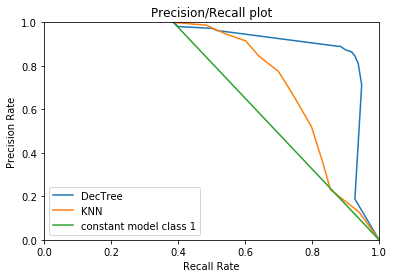

In [68]:
#Precision/Recall plot
plt.figure()
 
recr1,precr1,thresholds1 = metrics.precision_recall_curve(exp1, pred1)
recr2,precr2,thresholds2 = metrics.precision_recall_curve(exp2, pred2)
recr3,precr3,thresholds3 = metrics.precision_recall_curve(exp3, c1)


plt.plot( recr1,precr1, label = 'DecTree')
plt.plot( recr2,precr2, label = 'KNN')
plt.plot( recr3,precr3, label = 'constant model class 1')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision/Recall plot')
plt.legend(loc="lower left")
plt.show()

#### 2. Is it correct, that classifier from previous part #2 to identify class compare some estimation with threshold? What are those estimations? What thresholds were chosen?

* (09.04.17) 

DecisionTree thresholds::

In decision tree and KNN has threshold

In [143]:
print ("thresholds_tree:",thresholds1)
print("")
print ("thresholds_knn:",thresholds2)

thresholds_tree: [ 2.          1.          0.97664234  0.93181818  0.90909091  0.84615385
  0.8         0.76923077  0.40625     0.38888889  0.33333333  0.08366935
  0.07142857  0.06349206  0.00688468  0.        ]

thresholds_knn: [ 2.   1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0. ]


#### 3.2 Compare AUC-ROC.

In [ ]:
#bar chart
auc1 = roc_auc_score(np.array(y_test), np.array(pred1))
auc2 = roc_auc_score(np.array(y_test), np.array(pred2))
auc3 = roc_auc_score(np.array(y_test), np.array(c1))

objects = ('Decision tree', 'KNN', 'Constant')
y_pos = np.arange(len(objects))
performance = [auc1,auc2,auc3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean(AUC-ROC)')
plt.title('model')
 
plt.show()

## 4. Cross-validation and parameter selection

grid search : pick several values for every parameter, then evaluate every combination of parameters, and choose the best set from the point of optimized metric.grid search : pick several values for every parameter, then evaluate every combination of parameters, and choose the best set from the point of optimized metric.

#### 4.1 Choose cross-validation method. Fixate cross-validation split of train set. You should cross-validate on train samples from previous tasks, test should stay independent. Pay attention: when comparing models, cross-validation split must not change. #### 4.3 Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)

In [ ]:
%%time
#for decision tree classifier

from sklearn.model_selection import GridSearchCV
#Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
parameters = {'criterion':('gini', 'entropy'),'max_depth':[1, 2, 3, 4], 'max_features': ("auto", "sqrt", ),'min_samples_leaf': [1, 2, 3, 4]}

model = GridSearchCV(DecisionTreeClassifier(), parameters) 
model.fit(train, y_train)
print (sorted(model.cv_results_.keys()))
print('')
print ("best_estimator:", model.best_estimator_)
print ("best_parameters:", model.best_params_)
print ("best_score:", model.best_score_)
print("scorer=",model.scorer_)


#### 4.2 Choose one metric for optimization by grid search. Example: AUC-ROC.

In [ ]:
%%time
print('------------ AUC-ROC -------------------------')

model1 = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', n_jobs=4, cv=None)
model1.fit(train, y_train)
print (sorted(model1.cv_results_.keys()))
print('')
print ("AUC-ROC.best_estimator:", model1.best_estimator_)
print ("AUC-ROC.best_parameters:", model1.best_params_)
print ("AUC-ROC.best_score:", model1.best_score_)
print("AUC-ROC.scorer=",model1.scorer_)

##### test - OK

#### 4.4 Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.

In [ ]:
%%time
print ('for knn')
parameters = {'n_neighbors':[7, 5, 2,3],'metric': ('euclidean','chebyshev','minkowski'),'weights':('uniform','distance')}

model = GridSearchCV(KNeighborsClassifier(), parameters, scoring='roc_auc', n_jobs=6, cv=5)
model.fit(train, y_train)

#print (sorted(model.cv_results_.keys()))
#print ("best_estimator:", model.best_estimator_)
#print("scorer=",model.scorer_)
#print ("best_score:", model.best_score_)
print ("optimal set of parameters:", model.best_params_)

## ---------------------------------------------------------------------------------------------------------

# 09.04.17
#### precision - recall curve 

#### ROC

* (09.04.17) plot ROC curve correctly (use predict_proba)


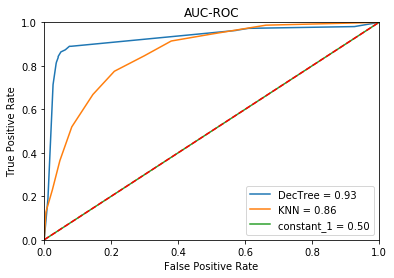

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#train = data_shuf[0:3000] ##
#test = data_shuf[3000:]   ##
#train , y_train = train.drop('spam', 1), list(train['spam']) ##
#test, y_test = test.drop('spam', 1), list(test['spam'])      ##

# Desicion Tree with rescaling
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(train, y_train)
exp1 = y_test
pred1= model.predict_proba(test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(exp1, pred1[:,1])
roc_auc = metrics.auc(fpr1, tpr1)

#KNN
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
neigh.fit(train, y_train) 
exp2 = y_test
pred2=neigh.predict_proba(test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(exp2, pred2[:,1])

#constant=1 model
model = DummyClassifier(strategy='constant', random_state=random_state, constant=1)
model.fit(train, y_train)
exp3 = y_test
c1 = model.predict_proba(test)
fpr3, tpr3, thresholds3 = metrics.roc_curve(exp3, c1[:,1])

plt.figure()
plt.title('AUC-ROC')

plt.plot(fpr1, tpr1, label = 'DecTree = %.2f' % roc_auc_score(np.array(y_test), np.array(pred1[:,1])))
plt.plot(fpr2, tpr2, label = 'KNN = %.2f' % roc_auc_score(np.array(y_test), np.array(pred2[:,1])))
plt.plot(fpr3, tpr3, label = 'constant_1 = %.2f' % roc_auc_score(np.array(y_test), np.array(c1[:,1])))

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Precision/Recall plot

* (09.04.17) fixed mistake in plotting precision - recall curve 

recall - for x axe

precision for y axe

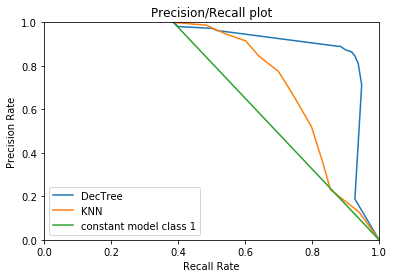

In [68]:
#Precision/Recall plot
plt.figure()
 
recr1,precr1,thresholds1 = metrics.precision_recall_curve(exp1, pred1)
recr2,precr2,thresholds2 = metrics.precision_recall_curve(exp2, pred2)
recr3,precr3,thresholds3 = metrics.precision_recall_curve(exp3, c1)


plt.plot( recr1,precr1, label = 'DecTree')
plt.plot( recr2,precr2, label = 'KNN')
plt.plot( recr3,precr3, label = 'constant model class 1')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('Precision/Recall plot')
plt.legend(loc="lower left")
plt.show()

#### 2. Is it correct, that classifier from previous part #2 to identify class compare some estimation with threshold? What are those estimations? What thresholds were chosen?

* (09.04.17) 

DecisionTree thresholds::

In decision tree and KNN has threshold

In [143]:
print ("thresholds_tree:",thresholds1)
print("")
print ("thresholds_knn:",thresholds2)

thresholds_tree: [ 2.          1.          0.97664234  0.93181818  0.90909091  0.84615385
  0.8         0.76923077  0.40625     0.38888889  0.33333333  0.08366935
  0.07142857  0.06349206  0.00688468  0.        ]

thresholds_knn: [ 2.   1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0. ]
